In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import numpy as np

from skopt import Optimizer
from skopt.learning import GaussianProcessRegressor
from skopt.learning.gaussian_process.kernels import ConstantKernel
from skopt.learning.gaussian_process.kernels import Matern

def f(x):
    return x[0]**2

NRANDOM = 3
NTOTAL = 10

cov_amplitude = ConstantKernel(1.0, (0.01, 1000.0))

other_kernel = Matern(
    length_scale=np.ones(1),
    length_scale_bounds=[(0.01, 100)],
    nu=2.5)

gp = GaussianProcessRegressor(
    kernel=cov_amplitude * other_kernel,
    normalize_y=True, alpha=0.0, noise=10e-7,
    n_restarts_optimizer=2)

opt = Optimizer(dimensions=[(-5.0, 5.0)],
                base_estimator=gp,
                n_random_starts=NRANDOM)

In [5]:
for i in range(NTOTAL):    
    # ask next x
    next_x = opt.ask()

    # do some fancy stuff to get the next function value
    next_f = f(next_x)
    
    # tell a pair to the optimizer
    res = opt.tell(next_x, next_f)

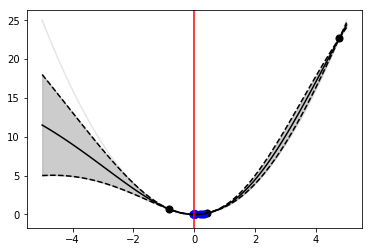

In [8]:
x = np.linspace(-5,5,100).reshape(-1,1)
prd,std = res.models[-1].predict(x, return_std = True)
y = np.apply_along_axis(f,1,x)
plt.plot(x.ravel(),y.ravel(), c = 'k', alpha = 0.1)
plt.plot(x[:,0],prd,linestyle = 'solid', c = 'k')
plt.plot(x[:,0],prd+std,linestyle = 'dashed', c= 'k')
plt.plot(x[:,0],prd-std,linestyle = 'dashed', c= 'k')
plt.fill_between(x[:,0].ravel(),prd+std,prd-std, alpha = 0.2, color = 'k')
plt.scatter(res.x_iters[:NRANDOM],res.func_vals[:NRANDOM], marker = '.', s = 200, color = 'k')
plt.scatter(res.x_iters[NRANDOM:],res.func_vals[NRANDOM:], marker = '.', s = 200, color = 'b')
plt.axvline(res.x[0],color = 'r')